# EPL FOOTBALL PREDICTIVE BOT

In [60]:
# Importing all the libraries
# Preprocessing 
import pandas as pd 
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# XGB
import xgboost as xgb
from xgboost import XGBClassifier

# Utilities 
from IPython.display import display
from scipy import io

# Sklearn models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Model selection
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


# Deep learning
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier


## Introduction to XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples. XGBoost is recognized for its speed and performance

Documentation: https://xgboost.readthedocs.io/en/latest/ 

https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

**Note that my dataset "Premier League Stats" is updated weekly at :**
http://www.football-data.co.uk/englandm.php

In [83]:
# Read CSV 
df = pd.read_csv(r"./csv/Premier League Stats.csv")

# See characteristics of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 62 columns):
Div         304 non-null object
Date        304 non-null object
HomeTeam    304 non-null object
AwayTeam    304 non-null object
FTHG        304 non-null int64
FTAG        304 non-null int64
FTR         304 non-null object
HTHG        304 non-null int64
HTAG        304 non-null int64
HTR         304 non-null object
Referee     304 non-null object
HS          304 non-null int64
AS          304 non-null int64
HST         304 non-null int64
AST         304 non-null int64
HF          304 non-null int64
AF          304 non-null int64
HC          304 non-null int64
AC          304 non-null int64
HY          304 non-null int64
AY          304 non-null int64
HR          304 non-null int64
AR          304 non-null int64
B365H       304 non-null float64
B365D       304 non-null float64
B365A       304 non-null float64
BWH         304 non-null float64
BWD         304 non-null float64
BWA       

In [3]:
# Describe each column 
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,...,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,1.588816,1.259868,0.687500,0.588816,14.128289,10.855263,4.822368,3.911184,10.486842,10.411184,...,2.100691,20.970395,-0.319079,2.012993,1.951974,2.008224,1.948224,3.287829,4.484243,5.586546
std,1.334490,1.152513,0.873732,0.778426,5.859183,4.362922,2.675156,2.216501,3.234482,3.576418,...,0.456592,1.512035,1.031955,0.229705,0.215241,0.218126,0.206740,2.955642,1.940131,5.814325
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,3.000000,...,1.450000,17.000000,-3.000000,1.550000,1.500000,1.500000,1.450000,1.070000,2.930000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,1.780000,20.000000,-1.000000,1.830000,1.790000,1.830000,1.777500,1.610000,3.380000,2.277500
50%,1.000000,1.000000,0.000000,0.000000,14.000000,10.000000,5.000000,4.000000,10.000000,10.000000,...,2.000000,21.000000,-0.250000,2.000000,1.930000,1.995000,1.940000,2.360000,3.700000,3.410000
75%,2.000000,2.000000,1.000000,1.000000,17.250000,14.000000,6.000000,5.000000,12.000000,13.000000,...,2.312500,22.000000,0.250000,2.170000,2.110000,2.152500,2.092500,3.455000,4.557500,6.440000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,...,3.960000,24.000000,2.500000,2.910000,2.830000,2.770000,2.650000,24.770000,14.920000,36.050000


In [4]:
# Peak first 10 rows
df.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89
5,E0,11/08/2018,Watford,Brighton,2,0,H,1,0,H,...,1.59,22,-0.25,2.07,2.01,1.90,1.86,2.58,3.08,3.22
6,E0,11/08/2018,Wolves,Everton,2,2,D,1,1,D,...,1.75,22,-0.25,2.04,1.98,1.92,1.88,2.44,3.23,3.32
7,E0,12/08/2018,Arsenal,Man City,0,2,A,0,1,A,...,2.42,20,0.75,1.78,1.74,2.21,2.15,4.43,4.13,1.81
8,E0,12/08/2018,Liverpool,West Ham,4,0,H,2,0,H,...,2.72,21,-1.75,1.95,1.90,2.06,1.97,1.25,6.95,12.00
9,E0,12/08/2018,Southampton,Burnley,0,0,D,0,0,D,...,1.60,20,-0.75,2.19,2.11,1.82,1.76,2.03,3.19,4.65


## Data Cleaning


In [5]:
# Drop all betting data from websites sur as Bet365, Betfair, etc.
desired_columns = ['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'] 
BPLData = df[desired_columns]
print(BPLData.head(10))

# NOTE: consider including Betting data since they represent fan's perspective on the competition

       HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  AS  HST  \
0    Man United       Leicester     2     1   H     1     0   H   8  13    6   
1   Bournemouth         Cardiff     2     0   H     1     0   H  12  10    4   
2        Fulham  Crystal Palace     0     2   A     0     1   A  15  10    6   
3  Huddersfield         Chelsea     0     3   A     0     2   A   6  13    1   
4     Newcastle       Tottenham     1     2   A     1     2   A  15  15    2   
5       Watford        Brighton     2     0   H     1     0   H  19   6    5   
6        Wolves         Everton     2     2   D     1     1   D  11   6    4   
7       Arsenal        Man City     0     2   A     0     1   A   9  17    3   
8     Liverpool        West Ham     4     0   H     2     0   H  18   5    8   
9   Southampton         Burnley     0     0   D     0     0   D  18  16    3   

   AST  HF  AF  HC  AC  HY  AY  HR  AR  
0    4  11   8   2   5   2   1   0   0  
1    1  11   9   7   4   1   1   0   

## Data Exploration

In [6]:
# Inspecting our dataset to find interesting insights 
n_features = BPLData.shape[1] # gives the number of features .shape[1] gives the number of columns (number of features)
n_matches = BPLData.shape[0]  # gives the number of matches .shape[0] gives the number of samples (rows) in the dataset
print(str(n_features) + ' features')
print(str(n_matches) + ' matches ')

20 features
304 matches 


In [7]:
# Explore how many goals home/away team scored 
total_home_goal_per_team = BPLData.groupby('HomeTeam').FTHG.sum().reset_index()
print(total_home_goal_per_team) # we can clearly see that Home teams score more goals than away teams on average

total_away_goal_per_team = BPLData.groupby('AwayTeam').FTAG.sum().reset_index()
print(total_away_goal_per_team)

          HomeTeam  FTHG
0          Arsenal    37
1      Bournemouth    28
2         Brighton    17
3          Burnley    19
4          Cardiff    18
5          Chelsea    29
6   Crystal Palace    11
7          Everton    23
8           Fulham    19
9     Huddersfield     7
10       Leicester    19
11       Liverpool    44
12        Man City    53
13      Man United    28
14       Newcastle    19
15     Southampton    19
16       Tottenham    25
17         Watford    19
18        West Ham    27
19          Wolves    22
          AwayTeam  FTAG
0          Arsenal    26
1      Bournemouth    15
2         Brighton    15
3          Burnley    16
4          Cardiff     9
5          Chelsea    21
6   Crystal Palace    25
7          Everton    20
8           Fulham    10
9     Huddersfield    11
10       Leicester    21
11       Liverpool    26
12        Man City    26
13      Man United    30
14       Newcastle    12
15     Southampton    15
16       Tottenham    32
17         Watford    23


In [8]:
# Explore how many goals home/away team conceded 
total_goal_conceded_per_home_team = BPLData.groupby('HomeTeam').FTAG.sum().reset_index()
print(total_goal_conceded_per_home_team)

total_goal_conceded_per_away_team = BPLData.groupby('AwayTeam').FTHG.sum().reset_index()
print(total_goal_conceded_per_away_team)

          HomeTeam  FTAG
0          Arsenal    12
1      Bournemouth    21
2         Brighton    15
3          Burnley    28
4          Cardiff    31
5          Chelsea    10
6   Crystal Palace    17
7          Everton    21
8           Fulham    30
9     Huddersfield    24
10       Leicester    19
11       Liverpool     9
12        Man City    12
13      Man United    18
14       Newcastle    20
15     Southampton    22
16       Tottenham    13
17         Watford    19
18        West Ham    23
19          Wolves    19
          AwayTeam  FTHG
0          Arsenal    27
1      Bournemouth    35
2         Brighton    27
3          Burnley    31
4          Cardiff    26
5          Chelsea    23
6   Crystal Palace    24
7          Everton    21
8           Fulham    40
9     Huddersfield    33
10       Leicester    24
11       Liverpool     9
12        Man City     9
13      Man United    22
14       Newcastle    20
15     Southampton    28
16       Tottenham    19
17         Watford    25


In [12]:
# Get a list of the teams
team_list = sorted(BPLData.HomeTeam.unique())
print(team_list)

['Arsenal', 'Bournemouth', 'Brighton', 'Burnley', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield', 'Leicester', 'Liverpool', 'Man City', 'Man United', 'Newcastle', 'Southampton', 'Tottenham', 'Watford', 'West Ham', 'Wolves']


In [13]:
# Find the average home and away goals scored by each team
# 1. Find number of home and away game each team played 
numberOfHomeGamesPerTeam = BPLData.groupby('HomeTeam').AwayTeam.count().reset_index()
print(numberOfHomeGamesPerTeam)

numberOfAwayGamesPerTeam = BPLData.groupby('AwayTeam').HomeTeam.count().reset_index()
print(numberOfAwayGamesPerTeam)

# 2. Find average goals scored at home/away: Divide total number of home/away goals by the number of home/away games 
total_home_goal_per_team['AverageHomeGoalsPerGame'] = (total_home_goal_per_team['FTHG']/numberOfHomeGamesPerTeam['AwayTeam'])
print(total_home_goal_per_team)

total_away_goal_per_team['AverageAwayGoalsPerGame'] = (total_away_goal_per_team['FTAG']/numberOfAwayGamesPerTeam['HomeTeam'])
print(total_away_goal_per_team)

          HomeTeam  AwayTeam
0          Arsenal        16
1      Bournemouth        16
2         Brighton        14
3          Burnley        15
4          Cardiff        16
5          Chelsea        15
6   Crystal Palace        15
7          Everton        16
8           Fulham        15
9     Huddersfield        16
10       Leicester        15
11       Liverpool        15
12        Man City        16
13      Man United        14
14       Newcastle        16
15     Southampton        15
16       Tottenham        14
17         Watford        14
18        West Ham        16
19          Wolves        15
          AwayTeam  HomeTeam
0          Arsenal        14
1      Bournemouth        15
2         Brighton        15
3          Burnley        16
4          Cardiff        14
5          Chelsea        15
6   Crystal Palace        15
7          Everton        15
8           Fulham        16
9     Huddersfield        15
10       Leicester        16
11       Liverpool        16
12        Man 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


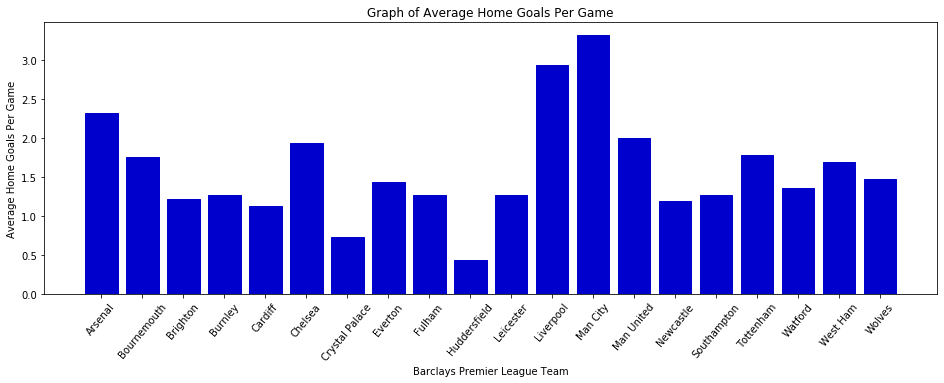

In [14]:
# Plot average home goal per team  
plt.figure(figsize=(16, 5))
plt.bar(range(len(total_home_goal_per_team['AverageHomeGoalsPerGame'])),total_home_goal_per_team['AverageHomeGoalsPerGame'], Color='#0000cc')
plt.xlabel('Barclays Premier League Team')
plt.ylabel('Average Home Goals Per Game')
plt.title('Graph of Average Home Goals Per Game')

# Create a subplot to label axis 
ax = plt.subplot(1,1,1)
ax.set_xticks(range(len(total_home_goal_per_team['AverageHomeGoalsPerGame'])))
ax.set_xticklabels(team_list, rotation = 50)

# Save plot 
plt.savefig('plots/AverageGoalsHome.png')

# Show plot  
plt.show()

# Close all graphs 
plt.close('all')

From the graph we can clearly see the higher performance of the top six teams (Manchester City, Manchester United, Arsenal, Chelsea, Tottenham, Liverpool).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


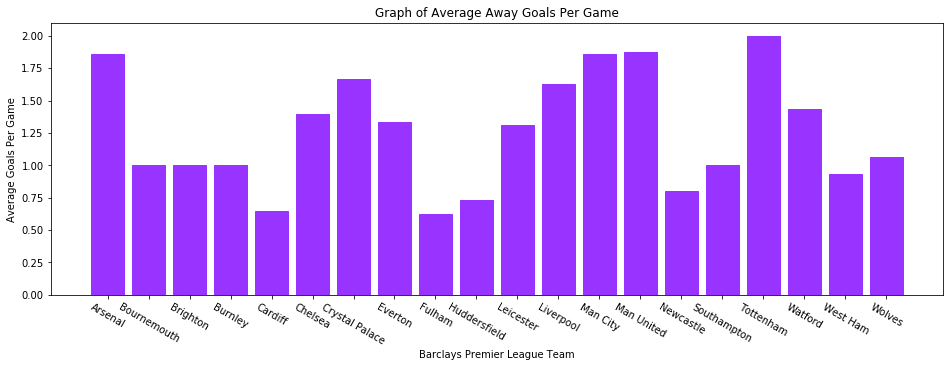

In [15]:
# Plot average away goals per team  
plt.figure(figsize=(16, 5))
plt.bar(range(len(total_away_goal_per_team['AverageAwayGoalsPerGame'])),total_away_goal_per_team['AverageAwayGoalsPerGame'],Color='#9933ff')
plt.xlabel('Barclays Premier League Team')
plt.ylabel('Average Goals Per Game')
plt.title('Graph of Average Away Goals Per Game')

# Create a subplot to label axis 
ax = plt.subplot(1,1,1)
ax.set_xticks(range(len(total_home_goal_per_team['AverageHomeGoalsPerGame'])))
ax.set_xticklabels(team_list, rotation = 330)

# Save plot 
plt.savefig('plots/AverageGoalsAway.png')

# Show plot 
plt.show()

# Close all graphs 
plt.close('all')


Remarkably, it is possible to notice that Arsenal, Tottenham, Man United, Man City and Crystal Palace perform particularly well on away games.

## Investigate Home Team Advantage

It is a known fact that that the home advantage exists in any organized sports. It is possible think of the following reasons:

- Football is a team sport, a cheering crowd helps morale
- Familarity with pitch and weather conditions helps
- No need to travel (less fatigue)

Hence, we are going to investigate the data and see if the advantage is shown in the data.

By parsing data from now back to EPL 1993-1994 Season, a dashboard has been built in order to the number of home team wins, away team wins and draw. Overall, there were 9890 English Premier League games.

In [16]:
%%HTML 
<div class='tableauPlaceholder' id='viz1572816377177' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;EP&#47;EPLHistory_15728153225520&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='EPLHistory_15728153225520&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;EP&#47;EPLHistory_15728153225520&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1572816377177');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

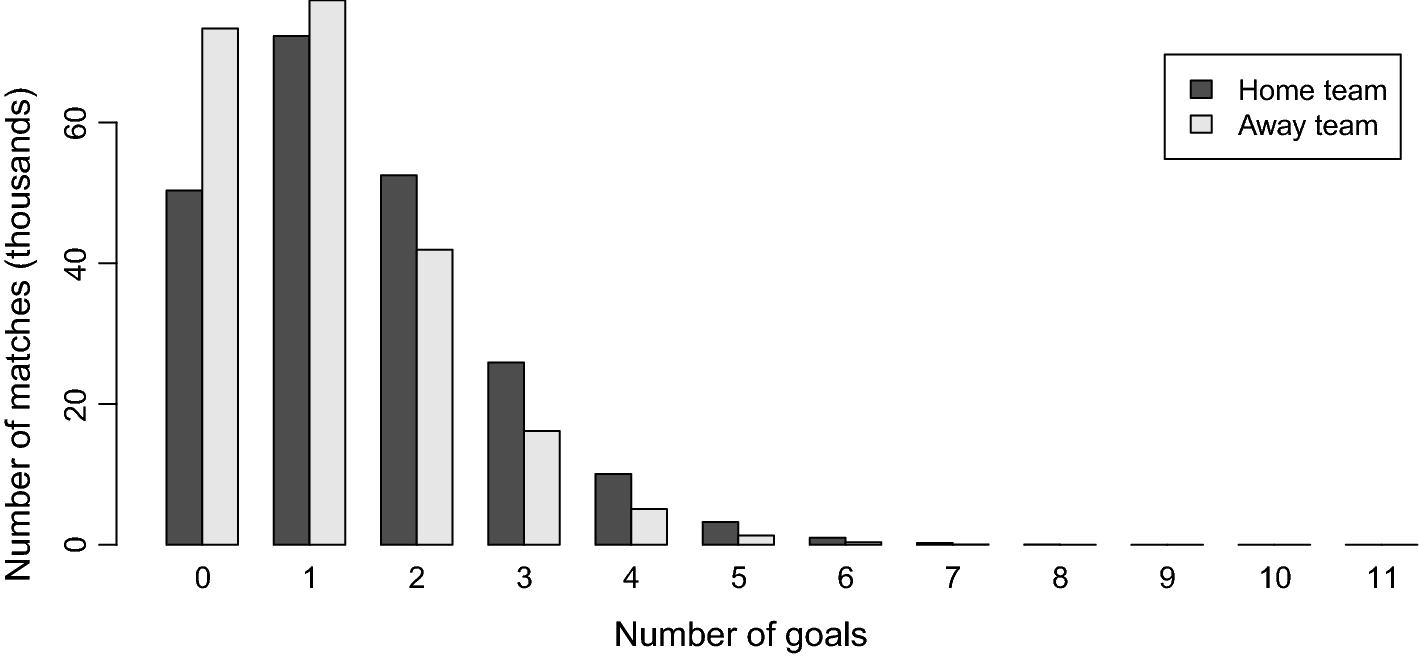

Credits: https://link.springer.com/article/10.1007/s10994-018-5741-1

The number of matches per number of goals scored by the home (dark grey) and away team (light grey)
Figure 2 shows the number of matches per number of goals scored by the home (dark grey) and away (light grey) teams. Home teams appear to score more goals than away teams, with home teams having consistently higher frequencies for two or more goals and away teams having higher frequencies for no goal and one goal. Overall, home teams scored 304,918 goals over the whole data set, whereas away teams scored 228,293 goals. In Section 1 of the Supplementary Material, the trend shown in Fig. 2 is also found to be present within each country, pointing towards the existence of a home advantage.


In [17]:
# Find percentage of Home wins this season to see if home team advantage is true 
homeTeamStats = BPLData.groupby('FTR').HomeTeam.count().reset_index()
print(homeTeamStats) 

# Number of home wins 
numberHomeWins = (len(BPLData[BPLData.FTR == 'H']))

  FTR  HomeTeam
0   A       100
1   D        58
2   H       146


 We can clearly see that there's a higher amount of H (represents HomeTeam wins) than A (represents Away team), therefore it confirms our hypothesis that Home Team has a higher winning chance

In [18]:
# Calculate Home Win Percentage
homeWinRate = (len(BPLData[BPLData.FTR == 'H'])/n_matches ) * 100
print('Home Team Win Rate: ' + str(homeWinRate))

# Calculate Away Win Percentage 
awayWinRate = (len(BPLData[BPLData.FTR == 'A'])/n_matches ) * 100
print('Away Team Win Rate: ' + str(awayWinRate))

Home Team Win Rate: 48.026315789473685
Away Team Win Rate: 32.89473684210527


 Home teams has a 47.4% winning rate compared to 33.2% from the Away team

In [19]:
# Average goals by home team (without considering any particular team)
totalHomeGoals = BPLData.FTHG.sum()
averageHomeTeamGoal = float(totalHomeGoals) / n_matches 
print("Average number of home goals :", averageHomeTeamGoal) 

# Average goals by away team (without considering any particular team)
totalAwayGoals = BPLData.FTAG.sum()
averageAwayTeamGoal = float(totalAwayGoals) / n_matches 
print("Average number of away goals :", averageAwayTeamGoal)

Average number of home goals : 1.5888157894736843
Average number of away goals : 1.2598684210526316


We can clearly see from this print statement that on average the home team scores more than the away team.

In [20]:
#Inspecting every game from my favorite team, displaying every Man City games...
df = BPLData[(BPLData['HomeTeam'] == 'Man City') | (BPLData['AwayTeam'] == 'Man City')]
ManCity = df.iloc[:]
print(ManCity.head())

    HomeTeam      AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  AS  HST  AST  \
7    Arsenal      Man City     0     2   A     0     1   A   9  17    3    8   
18  Man City  Huddersfield     6     1   H     3     1   H  32   5   14    1   
25    Wolves      Man City     1     1   D     0     0   D  11  18    2    6   
35  Man City     Newcastle     2     1   H     1     1   D  24   3    8    2   
43  Man City        Fulham     3     0   H     2     0   H  28   9    9    3   

    HF  AF  HC  AC  HY  AY  HR  AR  
7   11  14   2   9   2   2   0   0  
18   9   4  10   3   0   2   0   0  
25  13   8   5   9   1   2   0   0  
35   5  13   4   0   0   0   0   0  
43   7   7  10   4   0   0   0   0  


In [21]:
# Store average number of goals conceded at home and away (without considering any particular team)
averageHomeGoalsConceded = averageAwayTeamGoal
averageAwayGoalsConceded = averageHomeTeamGoal
print("Average number of goals conceded at home",averageHomeGoalsConceded)
print("Average number of goals conceded away",averageAwayGoalsConceded)


Average number of goals conceded at home 1.2598684210526316
Average number of goals conceded away 1.5888157894736843


In conclusion, teams conceded more goals when they are playing away 

## Feature Engineering

A major problem from this dataset is that all data are only available after a game. In other words, the features present in the dataset are only available at the end of every game since they are statistics on the corresponding fixture. Hence, in order to predict which team is going to win before a game happens, we have two choice: 

1- Consider all previous past games and predict off of them
Cons
- Not enough data (teams only play against each other twice per season). In addition, we do not want to include data from past seasons since each season, changes in players, managers and teams present in the league (promotions/relegations) could add more noise to our data.

2- Engineer features that represent each team's current form and performance

I chose to go with option two, since those engineered features are more representative of each teams current form in the season.

To engineer those features, I used the poisson distribution. The latter measures the probability of independent events occuring a certain number of times within a set period - such as number of goals scored in a football match. It can be used to do this by converting averages into a probability.

In fact, when you know the average number of times an event will happen, you can use Poisson to calculate how likely other outcomes deviate from this average.

**Calculating Attacking and Defensive strength**

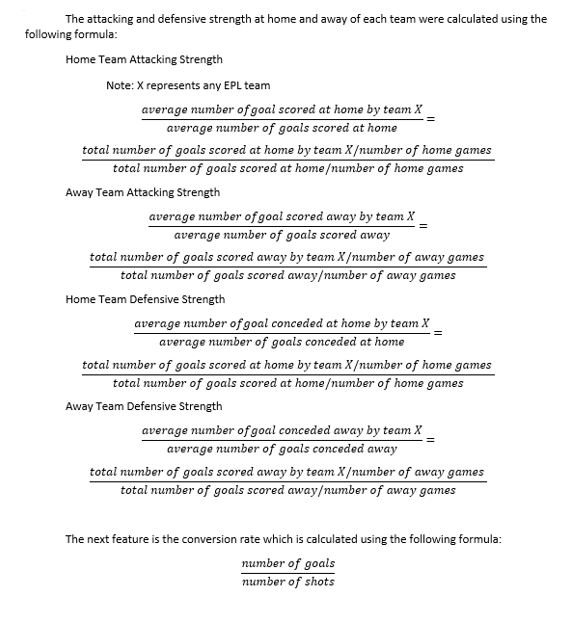

Credits: https://help.smarkets.com/hc/en-gb/articles/115001457989-How-to-calculate-Poisson-distribution-for-football-betting

In [30]:
# Find Home Team attacking strength
home_teams_attacking_strength = (total_home_goal_per_team.FTHG/numberOfHomeGamesPerTeam.AwayTeam) / averageHomeTeamGoal 

# Find away Team attacking strength 
away_teams_attacking_strength = (total_away_goal_per_team.FTAG/numberOfAwayGamesPerTeam.HomeTeam) / averageAwayTeamGoal 

# Home team defensive strength
home_teams_defensive_strength = (total_goal_conceded_per_home_team.FTAG /numberOfHomeGamesPerTeam.AwayTeam) / averageHomeGoalsConceded 

# Away team defensive strength
away_teams_defensive_strength = ( total_goal_conceded_per_away_team.FTHG/numberOfAwayGamesPerTeam.HomeTeam) / averageAwayGoalsConceded  

In [31]:
# Finding an index for yellow cards for teams at home or away
totalYellowCardPerHomeTeam = BPLData.groupby('HomeTeam').HY.sum().reset_index()
#print(totalYellowCardPerHomeTeam)
totalYellowCardPerAwayTeam = BPLData.groupby('AwayTeam').AY.sum().reset_index()
#print(totalYellowCardPerAwayTeam)
totalYellowCardHome = BPLData['HY'].sum()
#print(totalYellowCardHome)
totalYellowCardAway = BPLData['AY'].sum()
#print(totalYellowCardAway)
averageYellowCardHome = totalYellowCardHome/n_matches
#print(averageYellowCardHome)
averageYellowCardAway = totalYellowCardAway/n_matches
#print(averageYellowCardAway)
yellowCardIndexPerHomeTeam = (totalYellowCardPerHomeTeam.HY/numberOfHomeGamesPerTeam.AwayTeam) / averageYellowCardHome
#print(yellowCardIndexPerHomeTeam)
yellowCardIndexPerAwayTeam = (totalYellowCardPerAwayTeam.AY/numberOfAwayGamesPerTeam.HomeTeam) / averageYellowCardAway
#print(yellowCardIndexPerAwayTeam)

In [32]:
# Finding an index for red cards for teams at home or away
totalRedCardPerHomeTeam = BPLData.groupby('HomeTeam').HR.sum().reset_index()
#print(totalRedCardPerAwayTeam)
totalRedCardPerAwayTeam = BPLData.groupby('AwayTeam').AR.sum().reset_index()
#print(totalRedCardPerAwayTeam)
totalRedCardHome = BPLData.HR.sum()
# print(totalRedCardHome)
totalRedCardAway = BPLData.AR.sum()
# print(totalRedCardAway)
averageRedCardHome = totalRedCardHome / n_matches
#print(averageRedCardHome)
averageRedCardAway = totalRedCardAway / n_matches 
#print(averageRedCardAway)
redCardIndexPerHomeTeam = (totalRedCardPerHomeTeam.HR/numberOfHomeGamesPerTeam.AwayTeam) / averageRedCardHome
#print(redCardIndexPerHomeTeam)
redCardIndexPerAwayTeam = (totalRedCardPerAwayTeam.AR/numberOfAwayGamesPerTeam.HomeTeam) / averageRedCardAway
#print(redCardIndexPerAwayTeam)

In [33]:
#Finding an index for the # of shots on target for teams at home or away
totalShotOnTargetPerHomeTeam = BPLData.groupby('HomeTeam').HST.sum().reset_index()
#print(totalShotOnTargetPerHomeTeam)
totalShotOnTargetPerAwayTeam = BPLData.groupby('AwayTeam').AST.sum().reset_index()
#print(totalShotOnTargetPerAwayTeam)
totalShotOnTargetHome = BPLData.HST.sum()
#print(totalShotOnTargetHome)
totalShotOnTargetAway = BPLData.AST.sum()
#print(totalShotOnTargetAway)
shotOnTargetIndexPerHomeTeam = (totalShotOnTargetPerHomeTeam.HST/numberOfHomeGamesPerTeam.AwayTeam) / (totalShotOnTargetHome/n_matches)
#print(shotOnTargetIndexPerHomeTeam)
shotOnTargetIndexPerAwayTeam = (totalShotOnTargetPerAwayTeam.AST/numberOfAwayGamesPerTeam.HomeTeam) / (totalShotOnTargetAway/n_matches)
#print(shotOnTargetIndexPerAwayTeam)

In [34]:
# Finding an index for the number of fouls 
totalFoulsPerHomeTeam = BPLData.groupby('HomeTeam').HF.sum().reset_index() 
#print(totalFoulsPerHomeTeam)
totalFoulsPerAwayTeam = BPLData.groupby('AwayTeam').AF.sum().reset_index() 
#print(totalFoulsPerAwayTeam)
totalHomeFouls = BPLData.HF.sum()
#print(totalHomeFouls)
totalAwayFouls = BPLData.AF.sum()
#print(totalAwayFouls)
foulIndexPerHomeTeam = (totalFoulsPerHomeTeam.HF/numberOfHomeGamesPerTeam.AwayTeam) / (totalHomeFouls/n_matches)
# print(foulIndexPerHomeTeam)
foulIndexPerAwayTeam = (totalFoulsPerAwayTeam.AF/numberOfAwayGamesPerTeam.HomeTeam) / (totalAwayFouls/n_matches)
# print(foulIndexPerAwayTeam)

In [35]:
# Finding an index for the number of shots 
totalShotsPerHomeTeam = BPLData.groupby('HomeTeam').HS.sum().reset_index()
#print(totalShotsPerHomeTeam)
totalShotsPerAwayTeam = BPLData.groupby('AwayTeam').AS.sum().reset_index()
#print(totalShotsPerAwayTeam)
totalHomeShots = BPLData.HS.sum()
#print(totalHomeShots)
totalAwayShots = BPLData.AS.sum()
#print(totalAwayShots)
shotIndexPerHomeTeam = (totalShotsPerHomeTeam.HS/numberOfHomeGamesPerTeam.AwayTeam) / (totalHomeShots/n_matches)
# print(shotIndexPerHomeTeam)
shotIndexPerAwayTeam = (totalShotsPerAwayTeam.AS/numberOfAwayGamesPerTeam.HomeTeam) / (totalAwayShots/n_matches)
# print(shotIndexPerAwayTeam)

In [36]:
# Finding an index for the number of cornerkicks
totalNumberOfCornerKicksPerHomeTeam = BPLData.groupby('HomeTeam').HC.sum().reset_index()
#print(totalNumberOfCornerKicksPerHomeTeam)
totalNumberOfCornerKicksPerAwayTeam = BPLData.groupby('AwayTeam').AC.sum().reset_index()
#print(totalNumberOfCornerKicksPerAwayTeam)
totalCornerKicksHome = BPLData.HC.sum()
#print(totalCornerKicksHome)
totalCornerKicksAway = BPLData.AC.sum()
#print(totalCornerKicksAway)
cornerKicksIndexPerHomeTeam = (totalNumberOfCornerKicksPerHomeTeam.HC/numberOfHomeGamesPerTeam.AwayTeam) / (totalCornerKicksHome/n_matches)
#print(cornerKicksIndexPerHomeTeam)
cornerKicksIndexPerAwayTeam = (totalNumberOfCornerKicksPerAwayTeam.AC/numberOfAwayGamesPerTeam.HomeTeam) / (totalCornerKicksAway/n_matches)
#print(cornerKicksIndexPerAwayTeam)

In [37]:
# Finding an index of goal efficiency (Conversion Rate - Number of Goals / Number of Shots)
totalNumberOfGoalsPerHomeTeam = BPLData.groupby('HomeTeam').FTHG.sum().reset_index()
#print(totalNumberOfGoalsPerHomeTeam)
totalNumberOfGoalsPerAwayTeam = BPLData.groupby('AwayTeam').FTAG.sum().reset_index()
#print(totalNumberOfGoalsPerAwayTeam)
totalNumberOfShotsPerHomeTeam = BPLData.groupby('HomeTeam').HS.sum().reset_index()
#print(totalNumberOfShotsPerHomeTeam)
totalNumberOfShotsPerAwayTeam = BPLData.groupby('AwayTeam').AS.sum().reset_index()
#print(totalNumberOfShotsPerAwayTeam)
homeConversionRate = (totalNumberOfGoalsPerHomeTeam.FTHG/totalNumberOfShotsPerHomeTeam.HS) * 100
#print(homeConversionRate)
awayConversionRate = (totalNumberOfGoalsPerAwayTeam.FTAG/totalNumberOfShotsPerAwayTeam.AS) * 100
#print(awayConversionRate)

## Data preprocessing

This is a supervised learning problem. We have one target variable which is FTR (stands for full-time result). We want to predict FTR given all the features in the dataset. We also want to standarize our dataset and put it on the same scale (mean=0, variance=1) 

We want to combine or extract certain columns of this dataset to find the final features that we are going to work with.

**Features**
- last 5 games form (in the form of an integer 1.0 representing a Win, 0.5 Draw and 0.0 Loss)
- Attacking Score (float, based on the number of chances created per game, the number of goals scored and more...)
- Defending Score (float, based on the number of goals conceded per game, fouls committed, yellow and red cards conceded and more..)

**To do list**
- find a way to turn free kicks and corner kicks into goal scoring opportunities (how to consider them)?
- append last 5 games results to model
- Hyperparameter tuning to increase the performance of our model.

**Creating new DataFrame that displays characteristics per team with the following features attributes**
- Total Home Goals Scored Per Team
- Total Away Goals Scored Per Team
- Attack Strength Home/Away
- Home Goals Conceded
- Away Goals Conceded 
- Defensive Strength Home/Away
- Yellow card index per Home/Away Team
- Red card index per Home/Away team
- Shot On Target Index Per Home/Away Team
- Shot Index Per Home/Away Team 
- Foul Index Per Home/Away Team 
- Corner Kick Index Per Home/Away Team 
- Home/Away conversion rate **Very Important: This feature is tells us how much a team is efficient in front of the goal i.e. how many shots on target it needs to score a goal

**Important Note:** The higher a team's HAS/AAS score is, the better they are at scoring goals. On the other side, the lower a team's HDS/ADS is, the better they are at not conceding goals, which means the stronger they are in defense.

In [39]:
columns = ['Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS','HTYCI','ATYCI','HTRCI',
           'ATRCI','HTSOTI','ATSOTI','HTFI','ATFI','HTSI','ATSI','HTCKI','ATCKI','HTCR','ATCR']

# Create new DataFrame with engineered features per team 
season19 = pd.DataFrame(columns=columns)
season19.Team = team_list # list of the teams in order 
season19.HGS = total_home_goal_per_team.FTHG # Total home goal scored per team
season19.AGS = total_away_goal_per_team.FTAG # Total Away goal scored per team 
season19.HAS = home_teams_attacking_strength
season19.AAS = away_teams_attacking_strength
season19.HGC = total_goal_conceded_per_home_team.FTAG # Total home goal conceded per team 
season19.AGC = total_goal_conceded_per_away_team.FTHG # Total away goal conceded per team 
season19.HDS = home_teams_defensive_strength
season19.ADS = away_teams_defensive_strength
season19.HTYCI = yellowCardIndexPerHomeTeam
season19.ATYCI = yellowCardIndexPerAwayTeam
season19.HTRCI = redCardIndexPerHomeTeam
season19.ATRCI = redCardIndexPerAwayTeam
season19.HTSOTI = shotOnTargetIndexPerHomeTeam
season19.ATSOTI = shotOnTargetIndexPerAwayTeam
season19.HTFI = foulIndexPerHomeTeam
season19.ATFI = foulIndexPerAwayTeam
season19.HTSI = shotIndexPerHomeTeam
season19.ATSI = shotIndexPerAwayTeam
season19.HTCKI = cornerKicksIndexPerHomeTeam
season19.ATCKI = cornerKicksIndexPerAwayTeam
season19.HTCR = homeConversionRate
season19.ATCR = awayConversionRate

# Peek 10 columns new df
print(season19.head(10))

# Save new DataFrame 
season19.to_csv(r'csv/StrengthIndexStatsPerEPLTeam.csv', index = None, header = True)


             Team  HGS  AGS       HAS       AAS  HGC  AGC       HDS       ADS  \
0         Arsenal   37   26  1.455487  1.474077   12   27  0.595300  1.213842   
1     Bournemouth   28   15  1.101449  0.793734   21   35  1.041775  1.468599   
2        Brighton   17   15  0.764271  0.793734   15   27  0.850429  1.132919   
3         Burnley   19   16  0.797239  0.793734   28   31  1.481636  1.219462   
4         Cardiff   18    9  0.708075  0.510257   31   26  1.537859  1.168885   
5         Chelsea   29   21  1.216839  1.111227   10   23  0.529156  0.965079   
6  Crystal Palace   11   25  0.461560  1.322889   17   24  0.899565  1.007039   
7         Everton   23   20  0.904762  1.058312   21   21  1.041775  0.881159   
8          Fulham   19   10  0.797239  0.496084   30   40  1.587467  1.573499   
9    Huddersfield    7   11  0.275362  0.582071   24   33  1.190601  1.384679   

      HTYCI  ...    HTSOTI    ATSOTI      HTFI      ATFI      HTSI      ATSI  \
0  1.162447  ...  1.023874  

In [40]:
# Create new DataFrame on original dataset with engineered features for each team  
bot = BPLData[['HomeTeam', 'AwayTeam', 'FTR']]
HAS = []
HDS = []
AAS = []
ADS = []
HTYCI = []
ATYCI = []
HTRCI = []
ATRCI = []
HTSOTI = []
ATSOTI = []
HTFI = []
ATFI = []
HTSI = []
ATSI = []
HTCKI = []
ATCKI = []
HTCR = []
ATCR = []

for index,row in bot.iterrows(): # Iterate over DataFrame rows as (index, Series) pairs. 
    HAS.append(season19[season19.Team == row['HomeTeam']]['HAS'].values[0])     
    HDS.append(season19[season19.Team == row['HomeTeam']]['HDS'].values[0])
    AAS.append(season19[season19.Team == row['AwayTeam']]['AAS'].values[0])
    ADS.append(season19[season19.Team == row['AwayTeam']]['ADS'].values[0])
    HTYCI.append(season19[season19.Team==row['HomeTeam']]['HTYCI'].values[0])
    ATYCI.append(season19[season19.Team==row['AwayTeam']]['ATYCI'].values[0])
    HTRCI.append(season19[season19.Team==row['HomeTeam']]['HTRCI'].values[0])
    ATRCI.append(season19[season19.Team==row['AwayTeam']]['ATRCI'].values[0])
    HTSOTI.append(season19[season19.Team==row['HomeTeam']]['HTSOTI'].values[0])
    ATSOTI.append(season19[season19.Team==row['AwayTeam']]['ATSOTI'].values[0])
    HTFI.append(season19[season19.Team==row['HomeTeam']]['HTFI'].values[0])
    ATFI.append(season19[season19.Team==row['AwayTeam']]['ATFI'].values[0])
    HTSI.append(season19[season19.Team==row['HomeTeam']]['HTSI'].values[0])
    ATSI.append(season19[season19.Team==row['AwayTeam']]['ATSI'].values[0])
    HTCKI.append(season19[season19.Team==row['HomeTeam']]['HTCKI'].values[0])
    ATCKI.append(season19[season19.Team==row['AwayTeam']]['ATCKI'].values[0])
    HTCR.append(season19[season19.Team==row['HomeTeam']]['HTCR'].values[0])
    ATCR.append(season19[season19.Team==row['AwayTeam']]['ATCR'].values[0])

bot['HAS'] = HAS
bot['HDS'] = HDS
bot['HTYCI'] = HTYCI
bot['HTRCI'] = HTRCI
bot['HTSOTI'] = HTSOTI
bot['HTFI'] = HTFI
bot['HTSI'] = HTSI
bot['HTCKI'] = HTCKI
bot['HTCR'] = HTCR
bot['AAS'] = AAS
bot['ADS'] = ADS
bot['ATYCI'] = ATYCI
bot['ATRCI'] = ATRCI
bot['ATSOTI'] = ATSOTI
bot['ATFI'] = ATFI
bot['ATSI'] = ATSI
bot['ATCKI'] = ATCKI
bot['ATCR'] = ATCR

# Peak first five rows 
print(bot.head(5))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

       HomeTeam        AwayTeam FTR       HAS       HDS     HTYCI     HTRCI  \
0    Man United       Leicester   H  1.258799  1.020515  1.007836  1.447619   
1   Bournemouth         Cardiff   H  1.101449  1.041775  1.282700  1.266667   
2        Fulham  Crystal Palace   A  0.797239  1.587467  1.239944  1.351111   
3  Huddersfield         Chelsea   A  0.275362  1.190601  0.841772  3.800000   
4     Newcastle       Tottenham   A  0.747412  0.992167  0.921941  1.266667   

     HTSOTI      HTFI      HTSI  ...       HTCR       AAS       ADS     ATYCI  \
0  1.496005  1.069367  1.097090  ...  12.903226  1.041775  0.944099  0.796190   
1  0.894270  0.911857  0.813970  ...  15.217391  0.510257  1.168885  0.909932   
2  1.064484  1.087077  1.099449  ...   8.154506  1.322889  1.007039  1.158095   
3  0.609141  1.048934  0.765308  ...   4.046243  1.111227  0.965079  0.849270   
4  0.803547  1.048934  0.968801  ...   8.675799  1.587467  0.747412  1.013333   

      ATRCI    ATSOTI      ATFI      A

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [41]:
def preprocess(dataframe):
    # Create a function that appends strength index to Home and Away Team when receiving two teams as input    
    data = pd.DataFrame(columns=['HomeTeam', 'AwayTeam'], index=[0])
    data = dataframe
    HomeTeam = data.iloc[0,0]
    AwayTeam = data.iloc[0,1]

    data['HAS'] = season19[season19.Team == HomeTeam]['HAS'].reset_index(drop=True)
    data['HDS'] = season19[season19.Team == HomeTeam]['HDS'].reset_index(drop=True)
    data['AAS'] = season19[season19.Team == AwayTeam]['AAS'].reset_index(drop=True)
    data['ADS'] = season19[season19.Team == AwayTeam]['ADS'].reset_index(drop=True)
    data['HTYCI'] = season19[season19.Team==HomeTeam]['HTYCI'].reset_index(drop=True)
    data['ATYCI'] =season19[season19.Team==AwayTeam]['ATYCI'].reset_index(drop=True)
    data['HTRCI'] =season19[season19.Team==HomeTeam]['HTRCI'].reset_index(drop=True)
    data['ATRCI'] =season19[season19.Team==AwayTeam]['ATRCI'].reset_index(drop=True)
    data['HTSOTI'] =season19[season19.Team==HomeTeam]['HTSOTI'].reset_index(drop=True)
    data['ATSOTI'] =season19[season19.Team==AwayTeam]['ATSOTI'].reset_index(drop=True)
    data['HTFI'] =season19[season19.Team==HomeTeam]['HTFI'].reset_index(drop=True)
    data['ATFI'] =season19[season19.Team==AwayTeam]['ATFI'].reset_index(drop=True)
    data['HTSI'] =season19[season19.Team==HomeTeam]['HTSI'].reset_index(drop=True)
    data['ATSI'] =season19[season19.Team==AwayTeam]['ATSI'].reset_index(drop=True)
    data['HTCKI'] =season19[season19.Team==HomeTeam]['HTCKI'].reset_index(drop=True)
    data['ATCKI'] =season19[season19.Team==AwayTeam]['ATCKI'].reset_index(drop=True)
    data['HTCR'] =season19[season19.Team==HomeTeam]['HTCR'].reset_index(drop=True)
    data['ATCR'] =season19[season19.Team==AwayTeam]['ATCR'].reset_index(drop=True)
    
    return data


In [42]:
# Use LabelEncoder to encode labels - transforming H,D,A to integers 
label_encoder = LabelEncoder()
bot["Result"] = label_encoder.fit_transform(bot["FTR"])

In [47]:
# Separate into feature set and target variable
Y = bot['Result']
X = bot[['HAS', 'HDS', 'HTYCI', 'HTRCI', 'HTSOTI', 'HTFI', 'HTSI',
        'HTCKI', 'HTCR', 'AAS', 'ADS', 'ATYCI', 'ATRCI', 'ATSOTI', 'ATFI', 'ATSI', 'ATCKI', 'ATCR']]

In [48]:
# Standardising data
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [46]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, train_size = 0.80)

# LogisticClassifier = LogisticRegression(solver = 'newton-cg', multi_class= 'multinomial', dual = False, C = 0.75, max_iter = 1000) 
clf = LogisticRegression(C=4.5, penalty="l2", multi_class='ovr', solver='liblinear', max_iter=1000, dual=False, warm_start=True, fit_intercept=0.4) 
y_pred = clf.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6885245901639344


In [84]:
# saving the model and the weights 
import pickle
pickle.dump(clf, open("LogisticRegression.pkl","wb"))

NameError: name 'LogisticClassifier' is not defined

In [226]:
#Trying out different models
#Trying Logistic Regression 
LogisticClassifier = LogisticRegression(solver = 'newton-cg', multi_class= 'multinomial', dual = False, C = 0.75, max_iter = 3) 
scores = cross_val_score(LogisticClassifier, scaledData, Y, cv=10, scoring = 'accuracy')
print("LogisticRegression accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))
y_pred = cross_val_predict(LogisticClassifier, scaledData, Y, cv=10)
conf_mat = confusion_matrix(Y, y_pred)
print(classification_report(Y,y_pred))

clf1 = RandomForestClassifier()
scores = cross_val_score(clf1, scaledData, Y, cv=10, scoring = 'accuracy')
print("Random Forest accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))
y_pred1 = cross_val_predict(clf1, scaledData,Y, cv=10)
conf_mat1 = confusion_matrix(Y, y_pred1)

clf3 = LinearSVC()
scores = cross_val_score(clf3, scaledData, Y, cv=10, scoring = 'accuracy')
print("LinearSVC accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))
y_pred2 = cross_val_predict(clf3, scaledData, Y, cv=10)
conf_mat2 = confusion_matrix(Y, y_pred2)

#Trying XGBoost
xgBoost = xgb.XGBClassifier()
scores = cross_val_score(xgBoost, scaledData, Y, cv=10, scoring = 'accuracy')
print("XGBoost accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))
y_pred3 = cross_val_predict(xgBoost, scaledData, Y, cv=10)
conf_mat3 = confusion_matrix(Y, y_pred3)

#Trying SVM 
svm = SVC(gamma=0.001,C=1, decision_function_shape='ovo')
scores = cross_val_score(svm, scaledData, Y, cv=10)
print("SVC accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))
y_pred4 = cross_val_predict(svm, scaledData, Y, cv=10)
conf_mat4 = confusion_matrix(Y, y_pred4)
print(classification_report(Y,y_pred4))

print(conf_mat)

print(conf_mat1)

print(conf_mat2)

print(conf_mat3)

print(conf_mat4)





C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iteration

LogisticRegression accuracy: 0.60 (+/- 0.09)
              precision    recall  f1-score   support

          -1       0.60      0.66      0.63       100
           0       0.23      0.05      0.08        58
           1       0.63      0.78      0.70       146

   micro avg       0.60      0.60      0.60       304
   macro avg       0.49      0.50      0.47       304
weighted avg       0.54      0.60      0.56       304



C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

Random Forest accuracy: 0.57 (+/- 0.17)


C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the nu

LinearSVC accuracy: 0.61 (+/- 0.12)


C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

XGBoost accuracy: 0.58 (+/- 0.12)
SVC accuracy: 0.60 (+/- 0.04)
              precision    recall  f1-score   support

          -1       0.75      0.46      0.57       100
           0       0.00      0.00      0.00        58
           1       0.56      0.94      0.70       146

   micro avg       0.60      0.60      0.60       304
   macro avg       0.44      0.47      0.43       304
weighted avg       0.52      0.60      0.53       304

[[ 66   4  30]
 [ 18   3  37]
 [ 26   6 114]]
[[69  9 22]
 [21 10 27]
 [36 20 90]]
[[ 72   2  26]
 [ 19   2  37]
 [ 32   2 112]]
[[ 65  10  25]
 [ 13  10  35]
 [ 29  15 102]]
[[ 46   0  54]
 [  6   0  52]
 [  9   0 137]]


C:\Users\Mlej\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [112]:
# Trying simple feed forward neural network 
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(18,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train model
history = model.fit(X,Y,epochs=10,validation_split=0.20, batch_size = 1)


Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 32)                608       
_________________________________________________________________
dense_178 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_179 (Dense)            (None, 3)                 51        
Total params: 1,187
Trainable params: 1,187
Non-trainable params: 0
_________________________________________________________________
Train on 243 samples, validate on 61 samples
Epoch 1/10
243/243 [==============================] - 1s 3ms/step - loss: 1.0043 - accuracy: 0.5473 - val_loss: 0.8920 - val_accuracy: 0.6393
Epoch 2/10
243/243 [==============================] - 0s 2ms/step - loss: 0.8952 - accuracy: 0.6008 - val_loss: 0.8059 - val_accuracy: 0.7049
Epoch 3/10
243/243 [==============================] 

In [113]:
# Saving model 
model.save("best_model2.h5")